In [1]:
import pandas as pd
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('../data/climate.db')

# Load the datasets
climate_disasters = pd.read_sql_query("SELECT * FROM climate_disaster_freq", conn)
inform_risk = pd.read_sql_query("SELECT * FROM climate_inform_risk", conn)

conn.close()

1. How has the frequency of climate-related disasters evolved globally over the years?

2013    296.0
2014    290.0
2015    354.0
2016    294.0
2017    315.0
2018    287.0
2019    361.0
2020    373.0
2021    391.0
dtype: float64


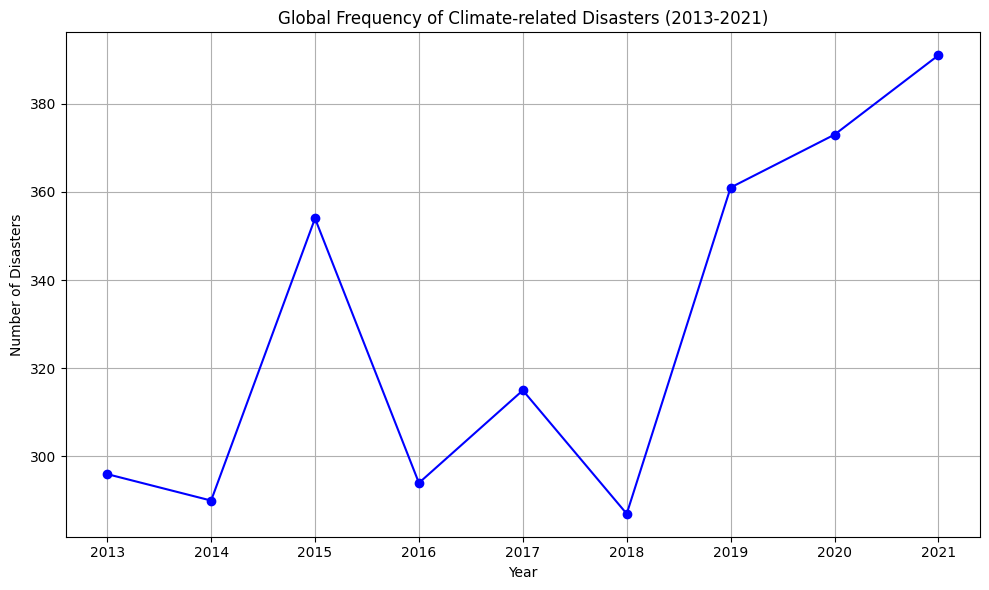

In [2]:
# Filter out 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# Sum the occurrences of disasters by year
disasters_by_year = total_disasters_data.loc[:, '2013':'2021'].sum()
print(disasters_by_year)

# Plotting the trend over the years
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='line', marker='o', color='b')
plt.title('Global Frequency of Climate-related Disasters (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.tight_layout()
plt.show()

The frequency of climate-related disasters has generally increased from 2013 to 2021, with a notable peak in 2021. A line plot showing the annual global frequency of climate-related disasters.

2. Which nations or regions experience particular kinds of climate-related disasters most frequently?

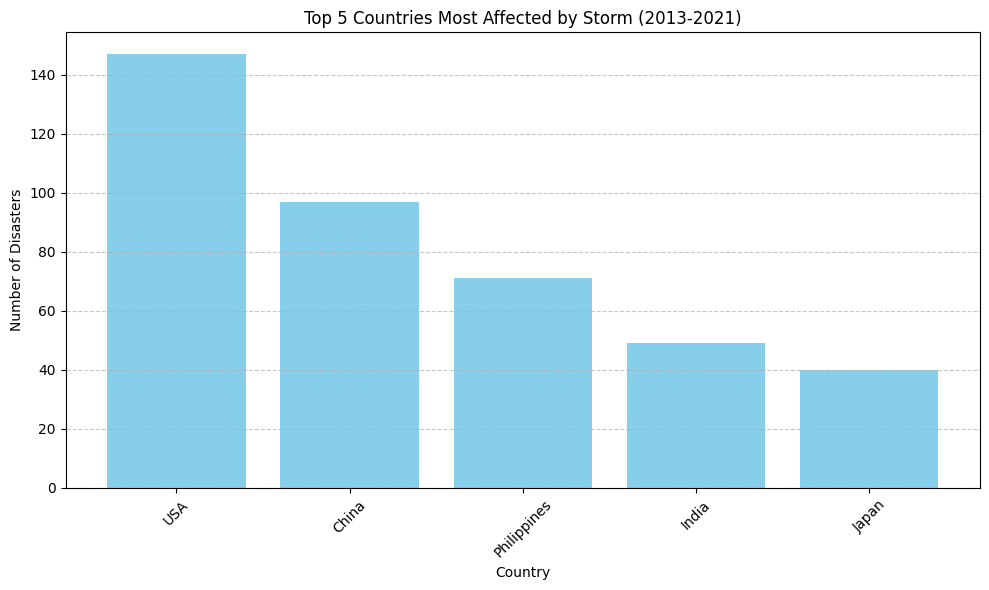

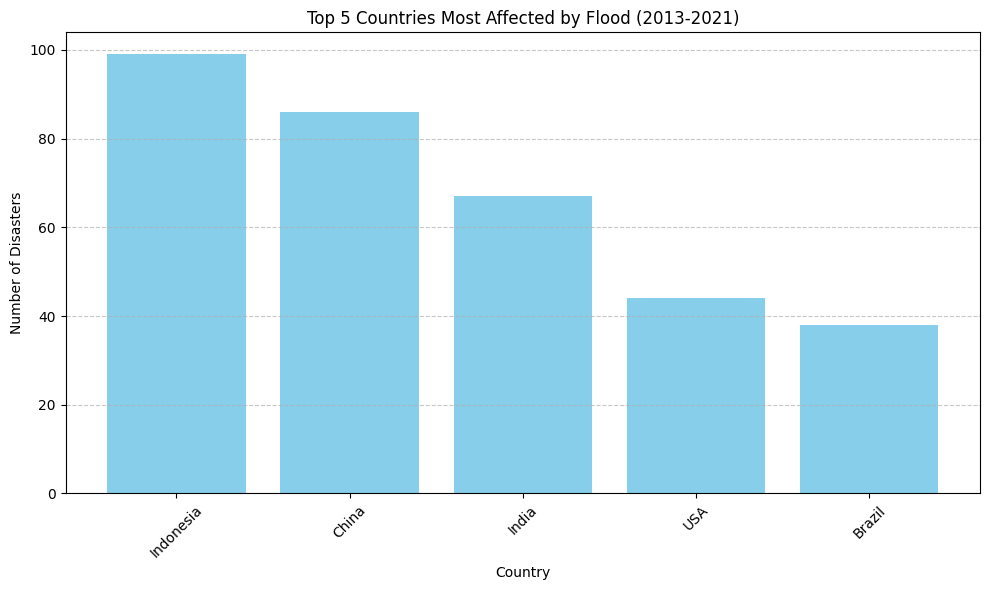

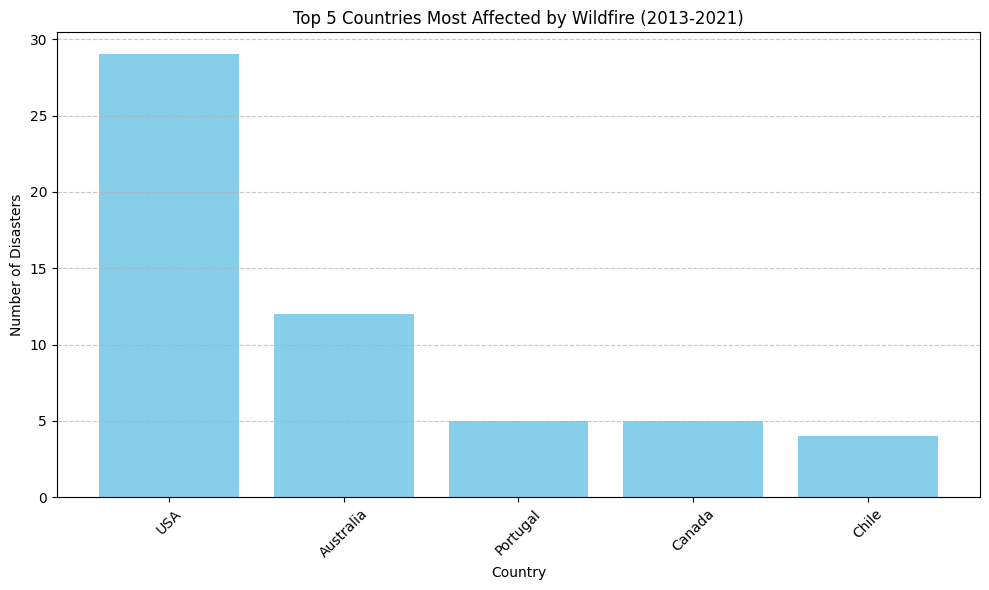

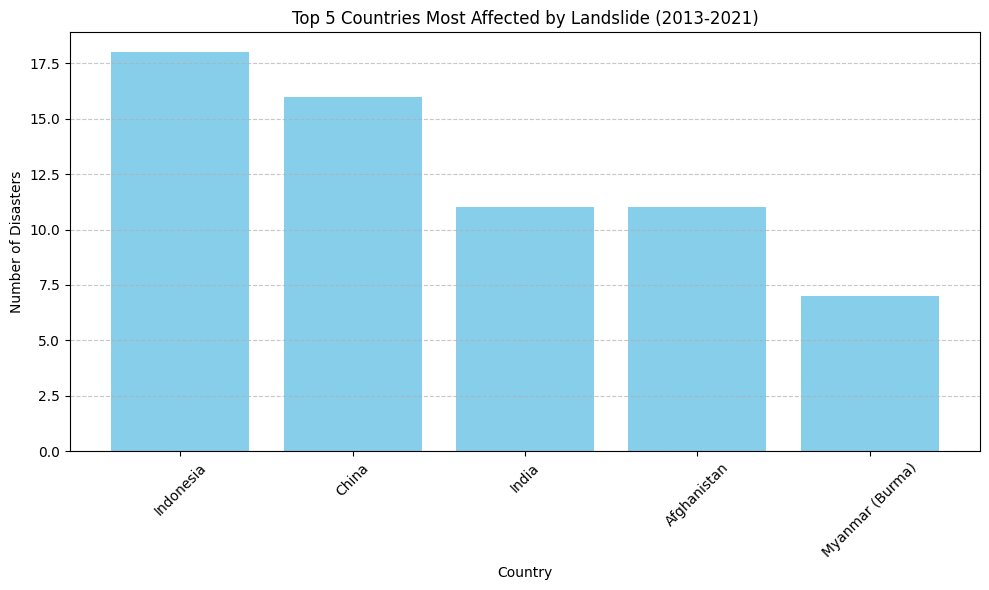

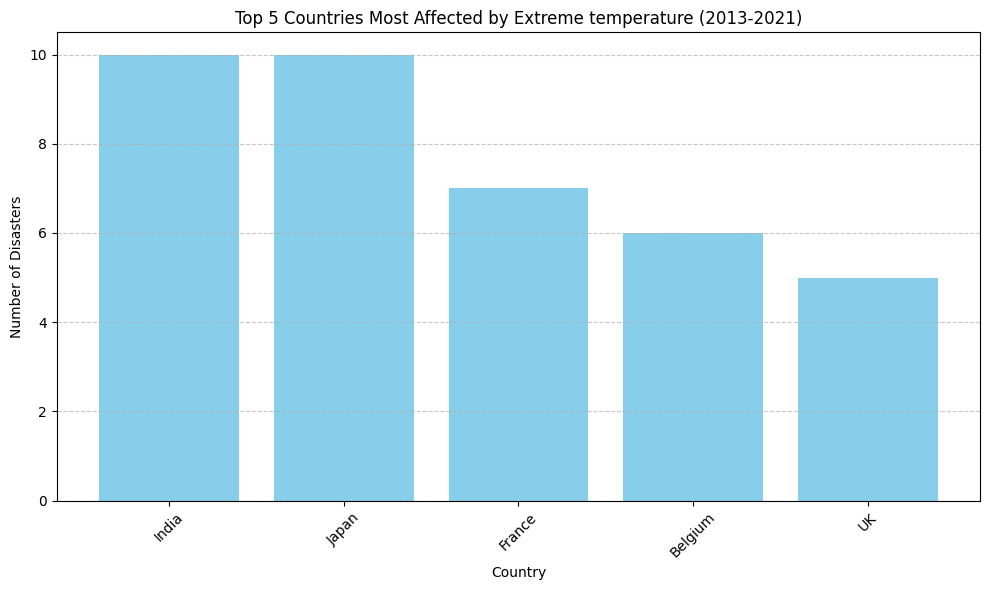

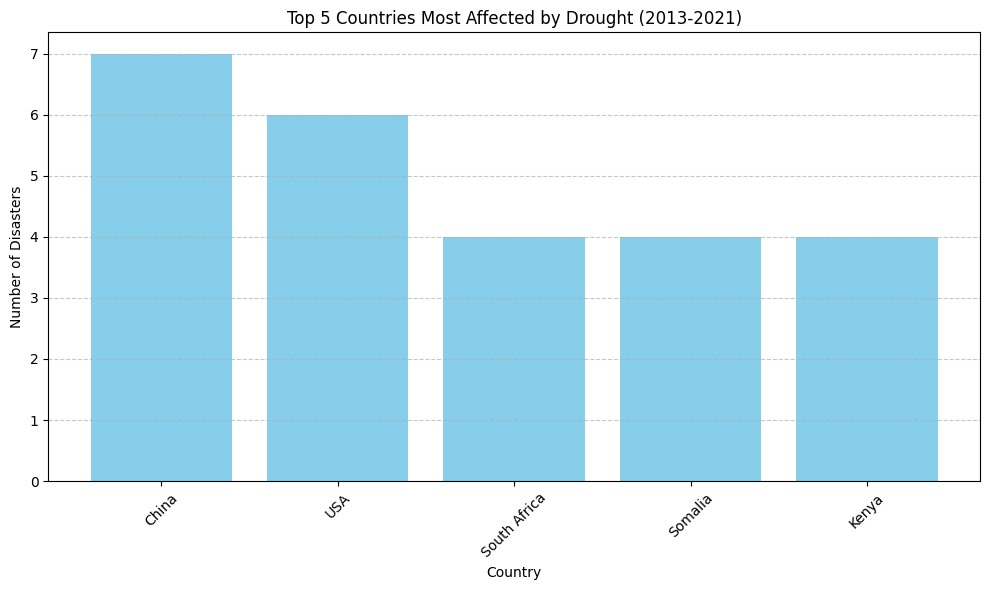

Top 5 Countries for Each Disaster Type:
        Country       Disaster_Type  Total
            USA               Storm  147.0
      Indonesia               Flood   99.0
          China               Storm   97.0
          China               Flood   86.0
    Philippines               Storm   71.0
          India               Flood   67.0
          India               Storm   49.0
            USA               Flood   44.0
          Japan               Storm   40.0
         Brazil               Flood   38.0
            USA            Wildfire   29.0
      Indonesia           Landslide   18.0
          China           Landslide   16.0
      Australia            Wildfire   12.0
          India           Landslide   11.0
    Afghanistan           Landslide   11.0
          India Extreme temperature   10.0
          Japan Extreme temperature   10.0
Myanmar (Burma)           Landslide    7.0
         France Extreme temperature    7.0
          China             Drought    7.0
        Belgiu

In [3]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# Sum the occurrences of each disaster type by country
disasters_per_country = total_disasters_data.groupby(['Country', 'Indicator']).sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1).reset_index()
disasters_per_country.columns = ['Country', 'Disaster_Type', 'Total']

# Find the top 5 countries for each disaster type
top_countries_per_disaster = disasters_per_country.sort_values(by='Total', ascending=False).groupby('Disaster_Type').head(5)

# Plotting for each disaster type
disaster_types = top_countries_per_disaster['Disaster_Type'].unique()

for disaster in disaster_types:
    subset = top_countries_per_disaster[top_countries_per_disaster['Disaster_Type'] == disaster]
    plt.figure(figsize=(10, 6))
    plt.bar(subset['Country'], subset['Total'], color='skyblue')
    plt.title(f'Top 5 Countries Most Affected by {disaster.capitalize()} (2013-2021)')
    plt.xlabel('Country')
    plt.ylabel('Number of Disasters')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Optional: Print the results
print("Top 5 Countries for Each Disaster Type:")
print(top_countries_per_disaster.to_string(index=False))


Certain countries are more affected by specific disasters. The USA and China experience many storms, while Indonesia, China, and India frequently face floods. This suggests the need for targeted disaster management strategies

3. Do more severe climate disasters occur in nations with higher INFORM risk indicators?

INFORM Risk Indicators: ['Climate-driven Hazard & Exposure' 'Climate-driven INFORM Risk Indicator'
 'Lack of coping capacity' 'Vulnerability' None]
                       Country  Total_Disasters
0                  Afghanistan             45.0
1                      Albania              8.0
2                      Algeria              8.0
3               American Samoa              0.0
4                       Angola             19.0
..                         ...              ...
206  Wallis and Futuna Islands              0.0
207         West Bank and Gaza              5.0
208                      Yemen             18.0
209                     Zambia              8.0
210                   Zimbabwe             12.0

[211 rows x 2 columns]
                 Country  Average_Risk_Index
0            Afghanistan            7.188889
1                Albania            3.144444
2                Algeria            3.300000
3                 Angola            4.855556
4    Antigua and Barbuda   

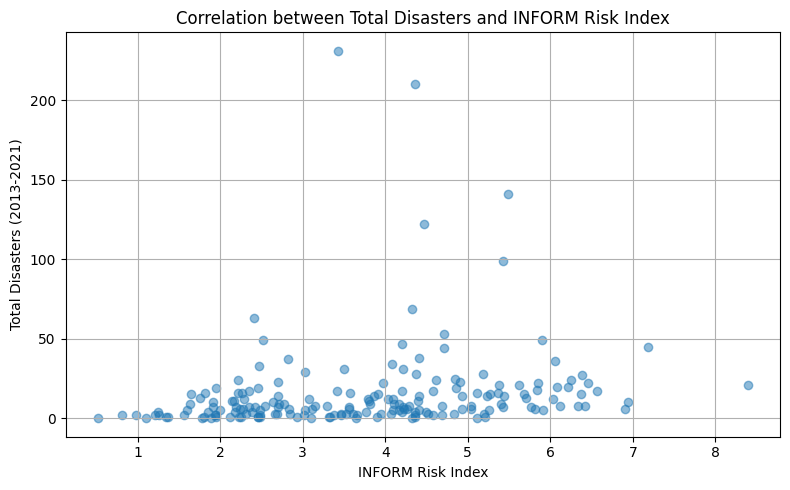

In [4]:
# Display the unique values in the 'Indicator' column of the inform_risk dataset
inform_risk_indicators = inform_risk['Indicator'].unique()
print("INFORM Risk Indicators:", inform_risk_indicators)

# Filter for the 'Climate-driven INFORM Risk Indicator' in the inform risk dataset
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Prepare the climate disaster data by summing the total disasters for each country
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
total_disasters_per_country = total_disasters_data.groupby('Country').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1).reset_index()
total_disasters_per_country.columns = ['Country', 'Total_Disasters']
print(total_disasters_per_country)

# Calculate the average risk index for each country
average_risk_index_per_country = inform_risk_data.groupby('Country').mean(numeric_only=True).loc[:, '2013':'2021'].mean(axis=1).reset_index()
average_risk_index_per_country.columns = ['Country', 'Average_Risk_Index']
print(average_risk_index_per_country)

# Merge the total disasters and average risk index data on Country
merged_data = pd.merge(total_disasters_per_country, average_risk_index_per_country, on='Country', how='inner')

# Compute the correlation
correlation = merged_data[['Total_Disasters', 'Average_Risk_Index']].corr().iloc[0, 1]
print(f"Correlation between total disasters and INFORM risk index: {correlation}")

# Plotting the correlation
plt.figure(figsize=(8, 5))
plt.scatter(merged_data['Average_Risk_Index'], merged_data['Total_Disasters'], alpha=0.5)
plt.title('Correlation between Total Disasters and INFORM Risk Index')
plt.xlabel('INFORM Risk Index')
plt.ylabel('Total Disasters (2013-2021)')
plt.grid(True)
plt.tight_layout()
plt.show()


Inform Risk is not consistent globally. The INFORM Risk Index alone may not predict disaster occurrences accurately.

C:\Users\BTC\AppData\Local\Temp\ipykernel_31972\4102333302.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])
C:\Users\BTC\AppData\Local\Temp\ipykernel_31972\4102333302.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])


The country with the highest correlation is China
Correlation: 0.95
P-value: 0.00
                 Country Correlation P-value
0            Afghanistan        0.00    1.00
1                Albania       -0.20    0.60
2                Algeria         NaN     NaN
3                 Angola       -0.85    0.00
4    Antigua and Barbuda       -0.11    0.77
..                   ...         ...     ...
178              Vietnam       -0.25    0.52
179   West Bank and Gaza        0.60    0.09
180                Yemen        0.69    0.04
181               Zambia        0.39    0.30
182             Zimbabwe        0.21    0.59

[183 rows x 3 columns]


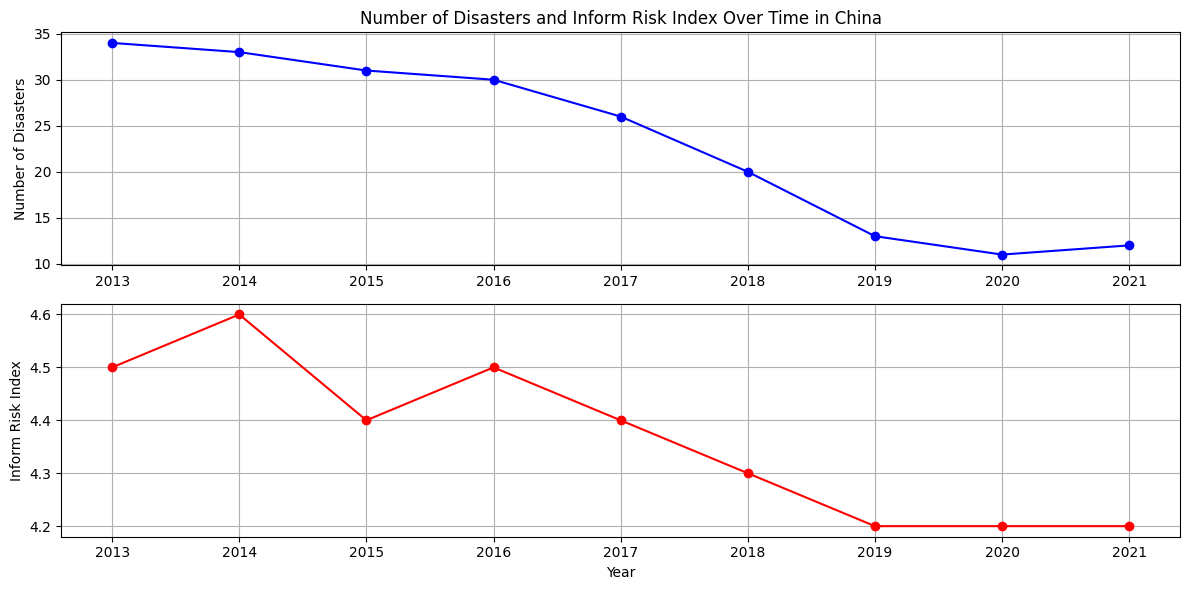

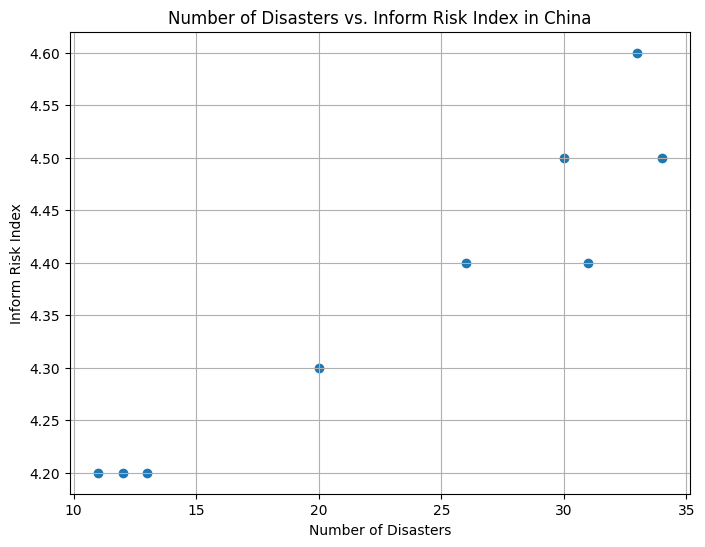

In [5]:
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Prepare the climate disaster data by excluding 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# List of countries in the dataset
countries = total_disasters_data['Country'].unique()

# Store results for each country
results = []

# Years to consider
years = [str(year) for year in range(2013, 2021 + 1)]

# Iterate over each country
for country in countries:
    # Filter the climate disaster data for the current country from 2013 to 2021
    climate_disasters_country = total_disasters_data[total_disasters_data['Country'] == country][['Indicator'] + years]
    climate_disasters_country.set_index('Indicator', inplace=True)
    climate_disasters_country = climate_disasters_country.T

    # Sum the occurrences of disasters by year
    total_disasters_time_series = climate_disasters_country.sum(axis=1)

    # Filter the inform risk data for the current country from 2013 to 2021
    inform_risk_country = inform_risk_data[inform_risk_data['Country'] == country][['Indicator'] + years]
    inform_risk_country.set_index('Indicator', inplace=True)
    inform_risk_country = inform_risk_country.T

    # Extract the 'Climate-driven INFORM Risk Indicator' values by year
    if 'Climate-driven INFORM Risk Indicator' in inform_risk_country.columns:
        inform_risk_time_series = inform_risk_country['Climate-driven INFORM Risk Indicator']

        # Combine both time series into a single DataFrame
        combined_time_series = pd.DataFrame({
            'Total_Disasters': total_disasters_time_series,
            'INFORM_Risk_Index': inform_risk_time_series
        }).dropna()

        # Check if there is enough data to calculate correlation
        if combined_time_series.shape[0] > 1 and combined_time_series['Total_Disasters'].nunique() > 1:
            # Calculate the correlation
            correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])
        else:
            correlation, p_value = float('nan'), float('nan')

        # Store the results
        results.append({
            'Country': country,
            'Correlation': f"{correlation:.2f}" if not pd.isna(correlation) else 'NaN',
            'P-value': f"{p_value:.2f}" if not pd.isna(p_value) else 'NaN'
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the country with the highest correlation
best_country = results_df.loc[results_df['Correlation'].astype(float).idxmax()]

print(f"The country with the highest correlation is {best_country['Country']}")
print(f"Correlation: {best_country['Correlation']}")
print(f"P-value: {best_country['P-value']}")

# Display the results
print(results_df)

# Plot the correlation for the best country
country = best_country['Country']
climate_disasters_country = total_disasters_data[total_disasters_data['Country'] == country][['Indicator'] + years]
climate_disasters_country.set_index('Indicator', inplace=True)
climate_disasters_country = climate_disasters_country.T
total_disasters_time_series = climate_disasters_country.sum(axis=1)
inform_risk_country = inform_risk_data[inform_risk_data['Country'] == country][['Indicator'] + years]
inform_risk_country.set_index('Indicator', inplace=True)
inform_risk_country = inform_risk_country.T
inform_risk_time_series = inform_risk_country['Climate-driven INFORM Risk Indicator']
combined_time_series = pd.DataFrame({
    'Total_Disasters': total_disasters_time_series,
    'INFORM_Risk_Index': inform_risk_time_series
})

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(combined_time_series.index, combined_time_series['Total_Disasters'], marker='o', linestyle='-', color='b')
plt.title(f'Number of Disasters and Inform Risk Index Over Time in {country}')
plt.ylabel('Number of Disasters')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(combined_time_series.index, combined_time_series['INFORM_Risk_Index'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Inform Risk Index')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])
plt.title(f'Number of Disasters vs. Inform Risk Index in {country}')
plt.xlabel('Number of Disasters')
plt.ylabel('Inform Risk Index')
plt.grid(True)
plt.show()


China show a strong positive correlation

C:\Users\BTC\AppData\Local\Temp\ipykernel_31972\385838666.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])
C:\Users\BTC\AppData\Local\Temp\ipykernel_31972\385838666.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])


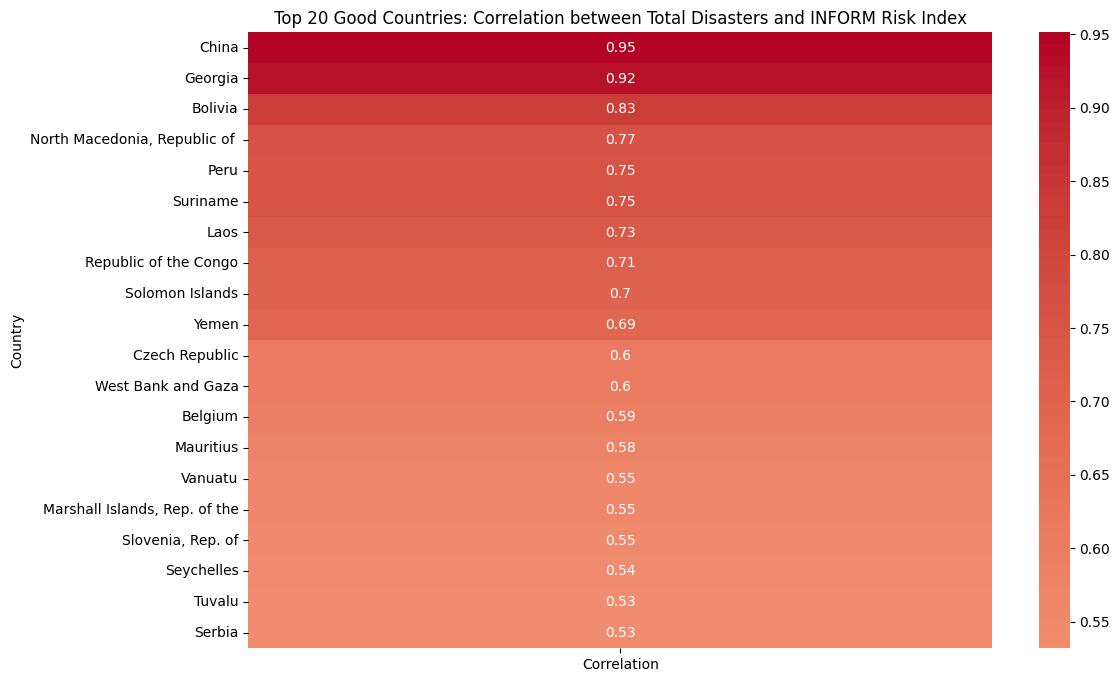

In [6]:
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Prepare the climate disaster data by excluding 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# List of countries in the dataset
countries = total_disasters_data['Country'].unique()

# Store results for each country
results = []

# Years to consider
years = [str(year) for year in range(2013, 2021 + 1)]

# Iterate over each country
for country in countries:
    # Filter the climate disaster data for the current country from 2013 to 2021
    climate_disasters_country = total_disasters_data[total_disasters_data['Country'] == country][['Indicator'] + years]
    climate_disasters_country.set_index('Indicator', inplace=True)
    climate_disasters_country = climate_disasters_country.T

    # Sum the occurrences of disasters by year
    total_disasters_time_series = climate_disasters_country.sum(axis=1)

    # Filter the inform risk data for the current country from 2013 to 2021
    inform_risk_country = inform_risk_data[inform_risk_data['Country'] == country][['Indicator'] + years]
    inform_risk_country.set_index('Indicator', inplace=True)
    inform_risk_country = inform_risk_country.T

    # Extract the 'Climate-driven INFORM Risk Indicator' values by year
    if 'Climate-driven INFORM Risk Indicator' in inform_risk_country.columns:
        inform_risk_time_series = inform_risk_country['Climate-driven INFORM Risk Indicator']

        # Combine both time series into a single DataFrame
        combined_time_series = pd.DataFrame({
            'Total_Disasters': total_disasters_time_series,
            'INFORM_Risk_Index': inform_risk_time_series
        }).dropna()

        # Check if there is enough data to calculate correlation
        if combined_time_series.shape[0] > 1 and combined_time_series['Total_Disasters'].nunique() > 1:
            # Calculate the correlation
            correlation, p_value = pearsonr(combined_time_series['Total_Disasters'], combined_time_series['INFORM_Risk_Index'])
        else:
            correlation, p_value = float('nan'), float('nan')

        # Store the results
        results.append({
            'Country': country,
            'Correlation': correlation if not pd.isna(correlation) else float('nan')
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Country')

# Sort the results by correlation and select the top 10
top_10_countries = results_df.nlargest(20, 'Correlation')

# Plot the heatmap for the top 10 countries
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_countries[['Correlation']], annot=True, cmap='coolwarm', center=0)
plt.title('Top 20 Good Countries: Correlation between Total Disasters and INFORM Risk Index')
plt.show()


The analysis was extended to 183 countries to determine the correlation between the total number of disasters and the INFORM Risk Index. It was found that certain countries exhibit a strong positive correlation between the total number of disasters and the INFORM Risk Index. Heatmap showing the top 20 countries with the highest correlation between total disasters and INFORM Risk Index.